# Prostate Cancer Recurrence Analysis
In this notebook, I explore and analyze the dataset "Blood Storage" from Cleveland Clinic Lerner Research Institute (http://www.lerner.ccf.org/qhs/datasets/).

**Let's play.**


### Dataset Description
categorical data: 
- RBC Age Group, AA, FamHx, TVol, T Stage, bGS, BN+, OrganConfined,PreopTherapy,sGS, AnyAdjTherapy,	AdjRadTherapy,	Recurrence,	Censor.
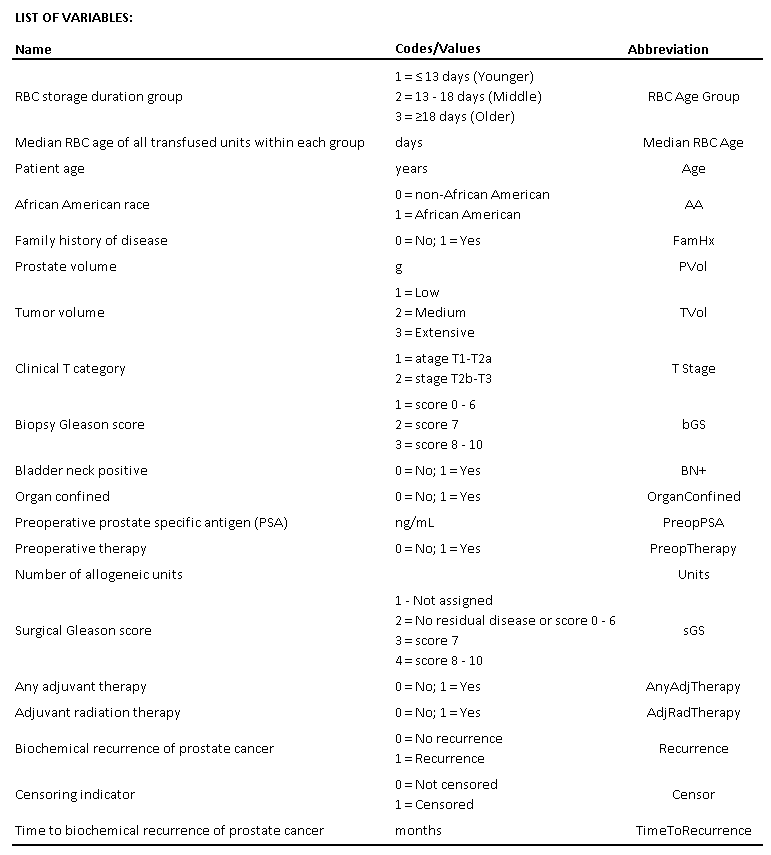


### First Part - Questions
1. coming soon
2. coming soon
3. coming soon
4. coming soon

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set pastel color for plots
sns.set(style="ticks", palette="pastel")

In [3]:
# import dataset and view first datas
df = pd.read_csv("https://raw.githubusercontent.com/elayni/prostate-cancer-recurrence-analysis/main/Dataset/BloodStorage.csv", error_bad_lines=False)

df.head()

,RBC Age Group,Median RBC Age,Age,AA,FamHx,PVol,TVol,T Stage,bGS,BN+,OrganConfined,PreopPSA,PreopTherapy,Units,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor,TimeToRecurrence
0,3,25,72.1,0,0,54.0,3.0,1.0,3.0,0,0,14.08,1,6,1,0,0,1,0,2.67
1,3,25,73.6,0,0,43.2,3.0,2.0,2.0,0,1,10.50,0,2,3,0,0,1,0,47.63
2,3,25,67.5,0,0,102.7,1.0,1.0,3.0,0,1,6.98,1,1,1,0,0,0,1,14.10
3,2,15,65.8,0,0,46.0,1.0,1.0,1.0,0,1,4.40,0,2,3,0,0,0,1,59.47
4,2,15,63.2,0,0,60.0,2.0,1.0,2.0,0,1,21.40,0,3,3,0,0,0,1,1.23


In [4]:
# missing data?
df.isna().any()

RBC Age Group       False
Median RBC Age      False
Age                 False
AA                  False
FamHx               False
PVol                 True
TVol                 True
T Stage              True
bGS                  True
BN+                 False
OrganConfined       False
PreopPSA             True
PreopTherapy        False
Units               False
sGS                 False
AnyAdjTherapy       False
AdjRadTherapy       False
Recurrence          False
Censor              False
TimeToRecurrence     True
dtype: bool

In [5]:
# count missing data
df.isna().sum()

RBC Age Group        0
Median RBC Age       0
Age                  0
AA                   0
FamHx                0
PVol                 9
TVol                 6
T Stage             13
bGS                  2
BN+                  0
OrganConfined        0
PreopPSA             3
PreopTherapy         0
Units                0
sGS                  0
AnyAdjTherapy        0
AdjRadTherapy        0
Recurrence           0
Censor               0
TimeToRecurrence     1
dtype: int64

In [6]:
# replacing missing data to column median
df['PVol'].fillna(df['PVol'].median(), inplace=True)
df['PreopPSA'].fillna(df['PreopPSA'].median(), inplace=True)
df['TimeToRecurrence'].fillna(df['TimeToRecurrence'].median(), inplace=True)
# only categorical missing data 
df.isna().any()

RBC Age Group       False
Median RBC Age      False
Age                 False
AA                  False
FamHx               False
PVol                False
TVol                 True
T Stage              True
bGS                  True
BN+                 False
OrganConfined       False
PreopPSA            False
PreopTherapy        False
Units               False
sGS                 False
AnyAdjTherapy       False
AdjRadTherapy       False
Recurrence          False
Censor              False
TimeToRecurrence    False
dtype: bool

In [8]:
# drop categorical data
df_nocatg = df.drop(["RBC Age Group", "AA", "FamHx", "TVol", "T Stage",
                    "bGS", "BN+"], axis = 1)
df_nocatg = df_nocatg.drop(["PreopTherapy", "sGS", "AnyAdjTherapy", "OrganConfined", 
                           "AdjRadTherapy", "Recurrence", "Censor"], axis = 1)

### Second Part
#### centrality and dispersion measures

In [9]:
# centrality and dispersion measures
# means and medians
df_means = pd.DataFrame(np.mean(df_nocatg, axis = 0), columns= ["means"])
df_medians = pd.Series(np.median(df_nocatg, axis=0), name = "medians")

df_means.reset_index(drop=True, inplace = True)
df_c = pd.concat([df_means, df_medians], axis=1)

df_c.rename(index = {0: "Median RBC Age", 1: "Age", 2: "PVol",
               3:"PreopPSA", 4:"Units", 5:"TimeToRecurrence"}, inplace= True)

# dataframe with centrality measures - mean and median
df_c

,means,medians
Median RBC Age,16.708861,15.00
Age,61.157278,61.85
PVol,56.236076,49.00
PreopPSA,8.166297,6.20
Units,2.455696,2.00
TimeToRecurrence,32.893766,25.30


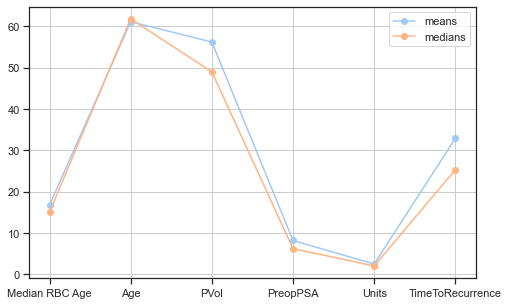

In [13]:
# comparison between means and medians
df_c.plot(grid=True, figsize=(8,5), marker = "o")

In [9]:
# mode for categorical data
df_catg = df.drop(["Median RBC Age", "Age", "PVol", "PreopPSA",
                   "Units", "TimeToRecurrence"], axis = 1)
df_catg.mode()

,RBC Age Group,AA,FamHx,TVol,T Stage,bGS,BN+,OrganConfined,PreopTherapy,sGS,AnyAdjTherapy,AdjRadTherapy,Recurrence,Censor
0,3,0,0,2.0,1.0,1.0,0,1,0,3,0,0,0,1


In [10]:
# variance
np.var(df_nocatg)

Median RBC Age       39.326630
Age                  52.255612
PVol                884.622559
PreopPSA             35.645736
Units                 3.596138
TimeToRecurrence    810.625530
dtype: float64

In [11]:
# standard deviation
df_nocatg.std()

Median RBC Age       6.281041
Age                  7.240269
PVol                29.789778
PreopPSA             5.979874
Units                1.899356
TimeToRecurrence    28.516643
dtype: float64

#### Boxplots

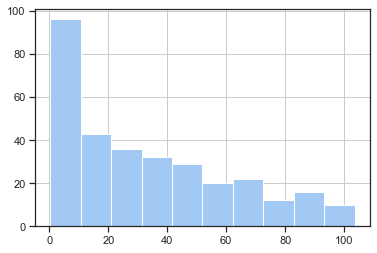

In [12]:
df["TimeToRecurrence"].hist()

Text(0.5, 1.0, 'Any Adjuvant Therapy and Time to Recurrence')

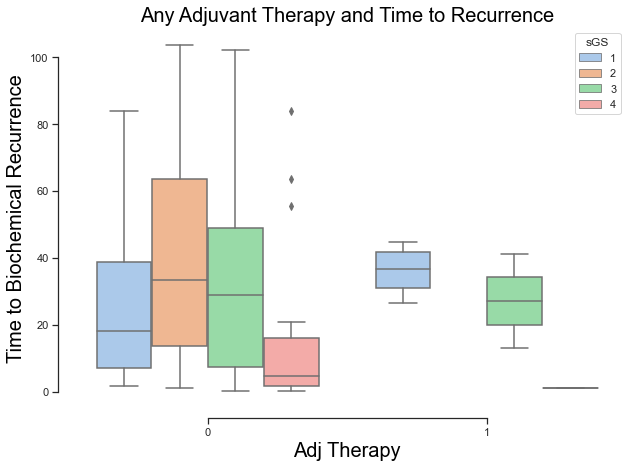

In [13]:
# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(10,7))
sns.boxplot(x="AnyAdjTherapy", y="TimeToRecurrence",
            hue="sGS", data=df)
sns.despine(offset=10, trim=True)
plt.xlabel('Adj Therapy', c ='black', fontsize=20)
plt.ylabel('Time to Biochemical Recurrence',c='g', color = 'black', fontsize=20)
plt.title('Any Adjuvant Therapy and Time to Recurrence', c='black', fontsize=20)